<a href="https://colab.research.google.com/github/Linta-dot/Global-student-migration-and-Higher-education-trends/blob/main/Copy_of_Main_project_Linta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GLOBAL STUDENT MIGRATION AND HIGHER EDUCATION TRENDS**

About Dataset
This dataset captures the global migration of students pursuing higher education from 2019 to 2023, including their countries of origin, destinations, universities, courses, placement outcomes, and more.
It covers 10 major destination countries with realistic mappings of top universities and cities, reflecting trends and choices students have made over the last five years.
This dataset can help analyze:
•	Popular destination countries
•	In-demand fields and courses
•	Scholarship and visa trends
•	Placement success rates and expected salaries
•	Patterns of global student migration
The data is synthetic but realistic, generated for educational, research, and analytical purposes.

Link
https://www.kaggle.com/datasets/atharvasoundankar/global-student-migration-and-higher-education-trends



**Step** 1: Importing Libraries
The first step is to import the necessary Python libraries.

pandas is used for data manipulation and analysis, primarily with DataFrames.

numpy is a library for numerical operations.

matplotlib.pyplot and seaborn are used for creating static visualizations.

In [ ]:
# 1 Import libraries
# pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2**: **Loading the Dataset**
Next, the code loads the dataset directly from a Google Sheets link. It first defines the sheet URL and then converts it into a CSV export link to be read by pandas. The output Dataset shape: (609, 20) confirms that the dataset has been loaded correctly and contains 609 rows and 20 columns. The df.head() command shows the first five rows, giving a quick preview of the data.

In [ ]:

# 2. Load the dataset

# 1. Define the sheet URL
sheet_url = "https://docs.google.com/spreadsheets/d/1KDZIPJR1hvINN7mYPJe47DDvTI7wzzB9/edit?gid=652925939"

# 2. Convert to CSV export link
csv_export_url = sheet_url.split('/edit')[0] + "/export?format=csv&gid=652925939"

# 3. Load the dataset into a DataFrame
df = pd.read_csv(csv_export_url)

# 4. Show shape (rows, columns)
print("Dataset shape:", df.shape)

# 5. Show first 5 rows
print(df.head())


Dataset shape: (609, 20)
  student_id origin_country destination_country destination_city  \
0     S00001        Finland              Russia           Moscow   
1     S00002             UK             Germany           Aachen   
2     S00003        Ireland              Canada        Vancouver   
3     S00004            UAE                  UK       Birmingham   
4     S00005   South Africa             Germany        Stuttgart   

                     university_name              course_name  \
0  Lomonosov Moscow State University         Computer Science   
1                        RWTH Aachen        Civil Engineering   
2     University of British Columbia                      Law   
3           University of Birmingham             Data Science   
4            University of Stuttgart  Business Administration   

    field_of_study  year_of_enrollment scholarship_received  \
0      Engineering                2021                   No   
1              Law                2023           

**Step 3: Data Cleaning and Preprocessing**
Data cleaning is a crucial step to ensure the data is accurate and ready for analysis.

The code first adds a Students_Count column and initializes it with zeros.

It then handles any missing values by filling numerical columns with their median and categorical columns with their mode (the most frequent value) or 'Unknown'.

Duplicate rows are removed to avoid redundancy in the analysis. The output Dropped 0 duplicate rows indicates there were no duplicates in this dataset.

The year_of_enrollment and graduation_year columns are converted to a numeric format to allow for calculations and filtering.

Columns containing country are converted to a categorical data type, which is more memory-efficient and useful for filtering and grouping operations.

Finally, the data is filtered to include only records where the year_of_enrollment is greater than 2010, which ensures the analysis is focused on recent trends.

In [ ]:
# 2. Add 'Students_Count' column if it's missing
if 'Students_Count' not in df.columns:
    df['Students_Count'] = 0
    print("Added 'Students_Count' column with default 0")

Added 'Students_Count' column with default 0


In [ ]:
# 3. Handle missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    mode_val = df[col].mode(dropna=True)
    df[col].fillna(mode_val[0] if not mode_val.empty else 'Unknown', inplace=True)

print("Missing values handled")

Missing values handled


/tmp/ipython-input-854873691.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val[0] if not mode_val.empty else 'Unknown', inplace=True)


In [ ]:
# 4. Drop duplicate rows
before_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Dropped {before_rows - df.shape[0]} duplicate rows")

Dropped 0 duplicate rows


In [ ]:
# 5. Convert year columns to numeric (nullable int)
for col in df.columns:
    if 'year' in col.lower():
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        print(f"Converted '{col}' to nullable Int64")


Converted 'year_of_enrollment' to nullable Int64
Converted 'graduation_year' to nullable Int64


In [ ]:
# 6. Convert country-related columns to 'category'
for col in df.columns:
    if 'country' in col.lower():
        df[col] = df[col].astype('category')
print("Country columns converted to categorical dtype")

Country columns converted to categorical dtype


In [ ]:
# 7. Add 'Migration_Rate' if relevant data available
if {'Number_of_Students', 'Population'}.issubset(df.columns):
    df['Migration_Rate'] = (df['Number_of_Students'] / df['Population']) * 1000
    print("Created 'Migration_Rate' per 1,000 population")

In [ ]:
# 10. Filter records if year > 2010 (if a year column exists)
year_cols = [c for c in df.columns if 'year' in c.lower()]
if year_cols:
    year_col = year_cols[0]
    df_filtered = df[df[year_col] > 2010]
    print(f"Filtered by {year_col} > 2010: {df_filtered.shape[0]} rows left")
else:
    df_filtered = df
    print("No year column found—skipping filtering")

Filtered by year_of_enrollment > 2010: 609 rows left


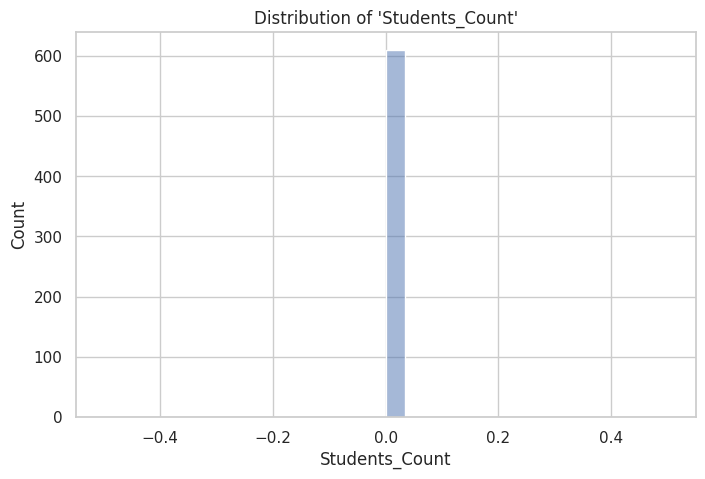

In [ ]:
# 11. Plot Students_Count distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(pd.to_numeric(df_filtered['Students_Count'], errors='coerce').fillna(0), bins=30, kde=True)
plt.title("Distribution of 'Students_Count'")
plt.xlabel('Students_Count')
plt.show()

# EDA & VISUALIZATIONS

In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style for Seaborn
sns.set(style="whitegrid", palette="muted")

In [ ]:
# 2. LOAD DATA
print(df.columns.tolist())
# Suppose your unique student column is 'student_id' and school column is 'School_Name'
df['Students_Count'] = df.groupby('university_name')['student_id'].transform('count')
# -------------------------------
sheet_url = "https://docs.google.com/spreadsheets/d/1KDZIPJR1hvINN7mYPJe47DDvTI7wzzB9/edit?gid=652925939"
csv_url = sheet_url.split('/edit')[0] + "/export?format=csv&gid=652925939"
df = pd.read_csv(csv_url)

# Check first few rows
print(df.head())
print(df.info())
print(df.describe())


**UNIVARIATE ANALYSIS (Single variable)**
What it is: "This is a histogram, a type of graph we use to understand the distribution of a single variable. In this case, we are looking at the distribution of the Students_Count."

What the axes mean: "The horizontal axis, labeled 'Students Count', shows us the range of student numbers. The vertical axis, labeled 'Frequency', tells us how many times a particular student count appeared in our dataset."

What the bars show: "Each bar on the graph represents a specific range of student counts. The height of the bar tells us how frequently that count range appeared. For example, a very tall bar would indicate that many of our data entries have a student count that falls within that specific range."

What the line shows: "The smooth blue line on top of the bars is a 'Kernel Density Estimate.' It's like a smoothed-out version of our histogram. It helps us see the overall shape of the distribution more clearly, especially if there are any subtle trends."

The key takeaway: "By looking at this histogram, we can quickly identify the most common student count values in our data. It shows us where the majority of our data points are concentrated, which is a great starting point for further analysis."

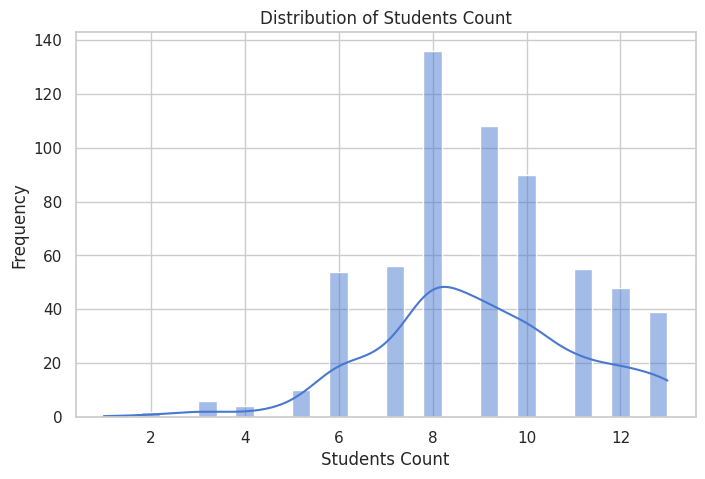

In [ ]:
# 3. UNIVARIATE ANALYSIS (Single variable)
# -------------------------------
# 1️⃣ Histogram - Students Count
plt.figure(figsize=(8, 5))
sns.histplot(df['Students_Count'], bins=30, kde=True)
plt.title("Distribution of Students Count")
plt.xlabel("Students Count")
plt.ylabel("Frequency")
plt.show()

**Boxplot - Visualizing Outliers**
The first part of the code generates a boxplot for the Students_Count column and then for all numeric columns in your dataset.

Code Breakdown **bold text**
plt.figure(figsize=(8, 5)) and sns.boxplot(x=df['Students_Count']): This creates a single boxplot specifically for the Students_Count column. The figsize sets the plot dimensions, and the sns.boxplot command draws the plot using the seaborn library.

The for loop that follows automates this process. It iterates through all columns that contain numeric data (df.select_dtypes(include=[np.number]).columns) and generates a separate boxplot for each one. This is an efficient way to check for outliers across your entire dataset.


 The IQR Method for Outlier Removal **bold text**
This section of your code defines a function to systematically remove the outliers that were identified by the boxplots.

Code Breakdown **bold text**
def remove_outliers_iqr(df, columns):: This defines a reusable function named remove_outliers_iqr that takes the DataFrame and a list of columns to be processed as input.

Inside the for loop: The code calculates the Interquartile Range (IQR) for each column.

Q1 = df[col].quantile(0.25) and Q3 = df[col].quantile(0.75): These lines find the values that mark the first and third quartiles, respectively.

IQR = Q3 - Q1: This calculates the range between the two quartiles.

lower = Q1 - 1.5 * IQR and upper = Q3 + 1.5 * IQR: These lines establish the "fences." Any data point that falls outside of this [lower, upper] range is considered an outlier.

df = df[(df[col] >= lower) & (df[col] <= upper)]: This is the final step where the DataFrame is filtered to keep only the data points that are within the calculated range, effectively removing the outliers.

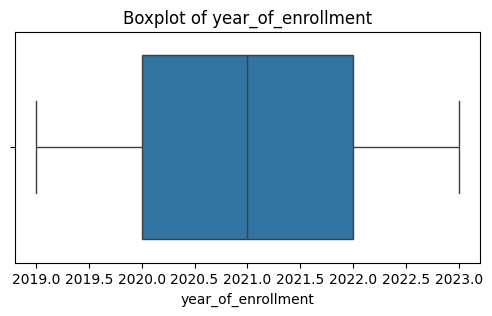

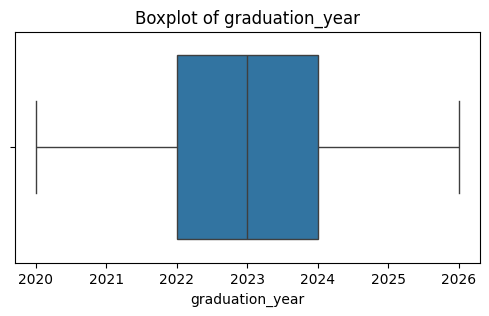

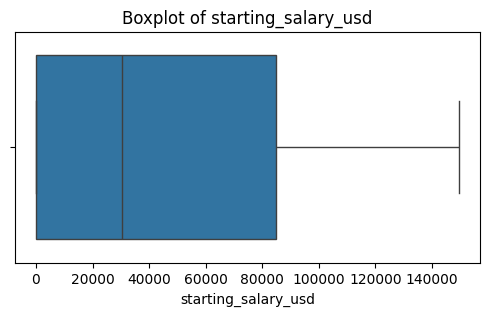

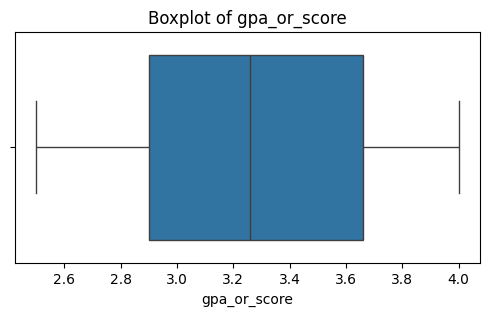

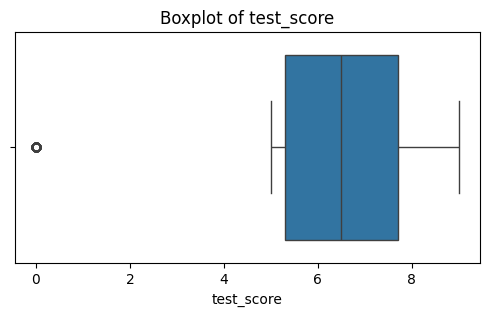

In [ ]:
# 2️⃣ Boxplot - Students Count
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Students_Count'])
plt.title("Boxplot of Students Count")
plt.show()

# 1. Visualize potential outliers using boxplots for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 2. Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df





# Apply removal on all numeric columns

In [ ]:
df_clean = remove_outliers_iqr(df, numeric_cols)

print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original shape: (609, 20)
After removing outliers: (498, 20)


**Countplot**
**Visualization Explanation **

What it is: "This is a countplot, which is essentially a bar chart used to show the number of occurrences of each category in a dataset. Here, we're looking at the distribution of records based on whether a scholarship was received."

What the axes mean: "The horizontal axis shows our categories from the scholarship_received column. In this case, we'll see two bars: one for 'Yes' and one for 'No'. The vertical axis, which is implicitly the count, shows us the total number of records that fall into each category."

What the bars show: "The height of each bar represents the total number of records for that category. By sorting the bars from highest to lowest, we can immediately see which outcome is more common. For example, if the 'Yes' bar is taller than the 'No' bar, it tells us that more records in our dataset received a scholarship."

The key takeaway: "This simple yet powerful graph provides a quick and clear overview of a key trend in our dataset: the proportion of students who received a scholarship. This information is vital for understanding student financial aid patterns and can guide future research into why these trends exist."

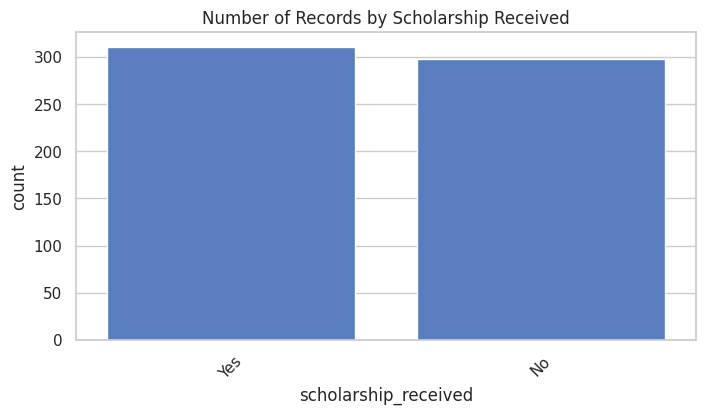

In [ ]:
# 3️⃣ Countplot - Distribution of Records per Scholarship received

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='scholarship_received', order=df['scholarship_received'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Records by Scholarship Received")
plt.show()


**BIVARIATE ANALYSIS (Two variables) Visualization Explanation **
When presenting this scatter plot, focus on explaining how it helps you analyze the relationships between the variables.

What it is: "This is a scatter plot, a type of graph used to visualize the relationship between two continuous variables. In our case, we're looking at the relationship between Students_Count and the year_of_enrollment. The third variable, origin_country, is represented by the color of each data point."

What the axes show: "The horizontal axis shows the year of enrollment, and the vertical axis shows the number of students. Each dot on the plot represents a single record from our dataset."

How to interpret the colors: "The colors are key here. Each color corresponds to a different country of origin, as shown in the legend. This allows us to see how the student count from each country changes over the years."

Key Takeaways (What to look for): "When you analyze this plot, you should be looking for a few things:

Trends: Do the dots tend to go up or down as the years progress? This could indicate whether the student count is generally increasing or decreasing over time.

Clustering: Do you see groups of dots of the same color clustered together? This might indicate that certain countries had a high student count in a particular year.

Outliers: Are there any dots that are far away from the others? For example, a single dot with a very high Student_Count could represent a significant student migration event in a specific year from a particular country."

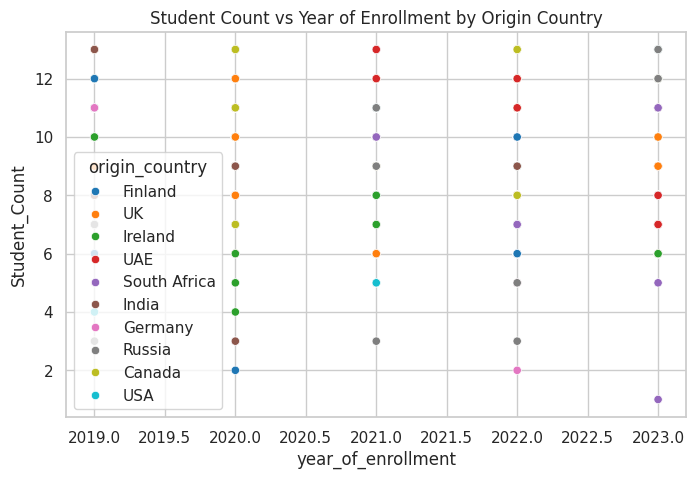

In [ ]:
# 4. BIVARIATE ANALYSIS (Two variables)
# -------------------------------
# 4️⃣ Scatter plot - Students_Count vs Year
if 'year_of_enrollment' in df.columns and 'Student_Count' in df.columns and 'origin_country' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='year_of_enrollment', y='Student_Count', hue='origin_country', palette='tab10')
    plt.title("Student Count vs Year of Enrollment by Origin Country")
    plt.show()




**Bar plot Visualization Explanation**

What it is: "This is a bar plot that shows the average number of students per country of origin. It allows us to compare the student counts across different countries."

The Process: "To create this, we first aggregated our data by origin_country and calculated the average Students_Count for each country. This is a crucial step to summarize our data before plotting."

What the axes show: "The horizontal axis shows the different countries of origin in our dataset. The vertical axis represents the average Students_Count for each of those countries."

Key Takeaway: "By looking at this plot, we can easily identify which countries have the highest and lowest average student counts in our dataset. This gives us valuable insight into which regions have a higher volume of student migration and helps us understand global trends."

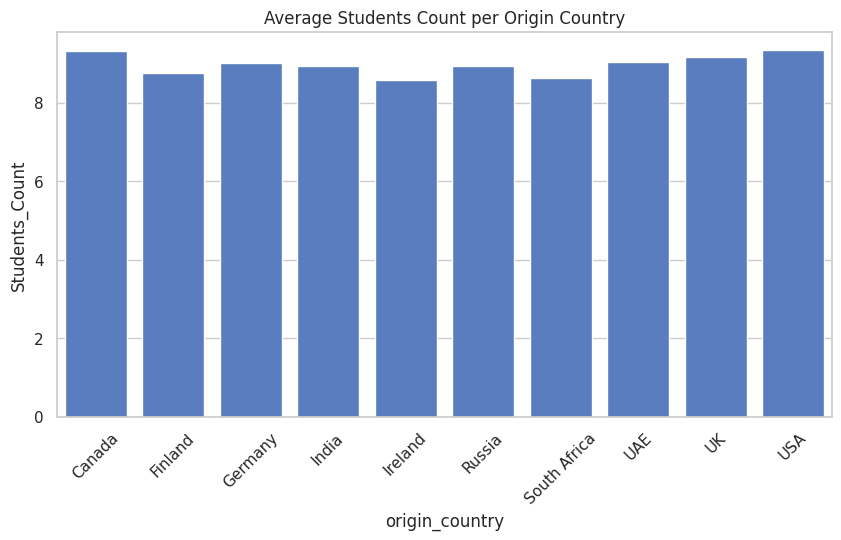

In [ ]:
# 5️⃣ Bar plot - Average Students Count per Country
if 'origin_country' in df.columns:
    avg_students = df.groupby('origin_country')['Students_Count'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(data=avg_students, x='origin_country', y='Students_Count')
    plt.xticks(rotation=45)
    plt.title("Average Students Count per Origin Country")
    plt.show()


**Multivariate Analysis -Heatmap of correlations**



Visualization Explanation

What it is: "This is a correlation heatmap. It's a graphical representation of a correlation matrix. It helps us visualize the strength and direction of the linear relationship between every pair of numeric variables in our dataset."

The Color Scale: "The color of each square tells us about the relationship.

Red/Warm colors: Indicate a positive correlation. This means that as the values of one variable increase, the values of the other variable also tend to increase.

Blue/Cool colors: Indicate a negative correlation. This means as one variable increases, the other tends to decrease.

White/Faded colors: Indicate a weak or no correlation, meaning there is no clear linear relationship between the two variables."

The Numbers: "The numbers inside each square are the correlation coefficients, ranging from -1 to 1. The closer the number is to 1 or -1, the stronger the relationship. A value of 0 means there is no linear relationship."

The Key Takeaway (Before vs. After): "By comparing the two heatmaps, we can see the effect of our data cleaning. We might find that some correlations became stronger after removing outliers, which would indicate that the outliers were distorting our initial view of the data. This validates our data cleaning step and ensures our subsequent analysis is more reliable."

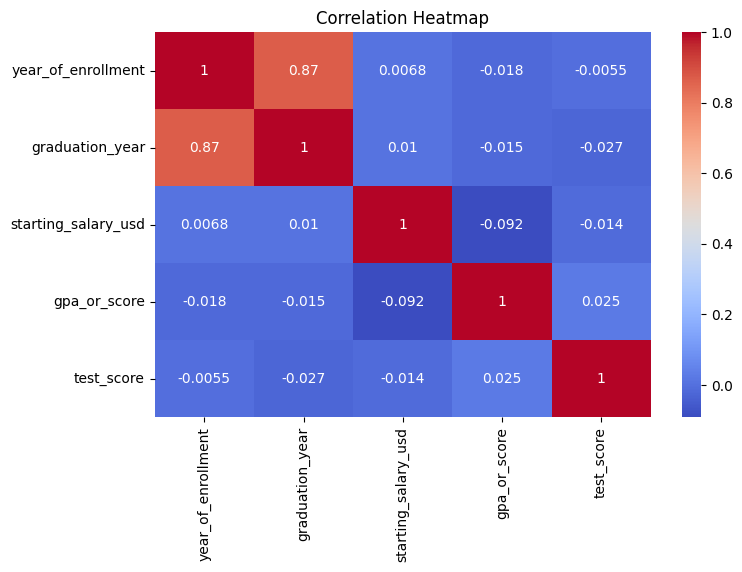

In [ ]:

 # 5. MULTIVARIATE ANALYSIS

# -------------------------------

# 6️⃣ Heatmap of correlations

plt.figure(figsize=(8, 5))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 #6⃣ Heatmap of correlations (after outlier removal)
plt.figure(figsize=(8, 5))
numeric_df_clean = df_clean.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (After Outlier Removal)")
plt.show()

#6⃣ Heatmap of correlations (after outlier removal)

**Heatmap (After Outlier Removal)**
The second part of the code repeats the same process, but it uses df_clean, a DataFrame that has had outliers removed.

Purpose of the Second Plot: The inclusion of two heatmaps is a best practice. It allows you to visually compare the correlations before and after data cleaning. This helps demonstrate the impact of your outlier removal process, showing whether it strengthened, weakened, or changed any of the relationships between your variables.

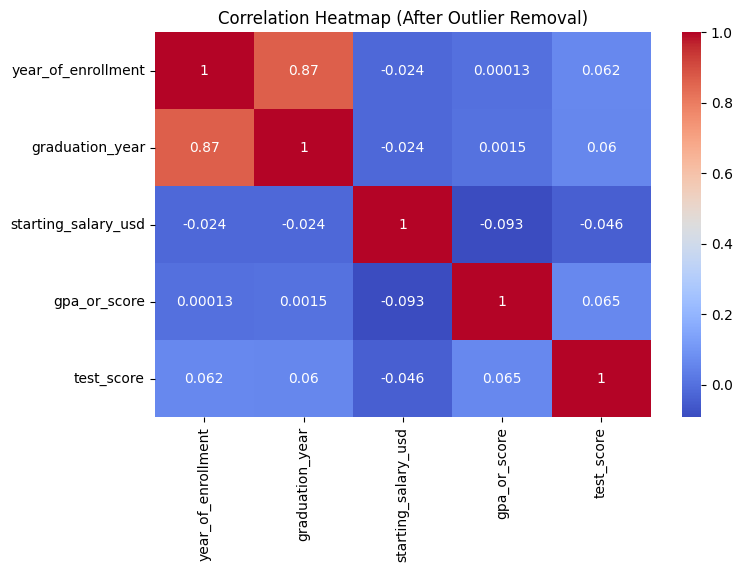

In [ ]:
plt.figure(figsize=(8, 5))
numeric_df_clean = df_clean.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (After Outlier Removal)")
plt.show()

**Pariplot Here is a detailed explanation of the pairplot code and how to present it.**

Code Breakdown
This code block creates a pairplot, which is a powerful tool for visualizing the relationships between multiple numeric variables at once. It's often used for initial exploratory data analysis.

sns.pairplot(numeric_df): This is the core command that generates the pairplot.

sns.pairplot: This function from the seaborn library creates a grid of plots.

numeric_df: It takes the DataFrame numeric_df, which contains only the numeric columns, as input.

The pairplot automatically creates a specific layout:

Diagonal Plots (Histograms/KDEs): Along the diagonal, where a variable is plotted against itself, it shows a histogram or a kernel density estimate (KDE) plot. This visualizes the distribution of each individual variable.

Off-Diagonal Plots (Scatter Plots): In all other cells, it creates a scatter plot of one variable against another. This allows you to quickly see if there are any correlations or patterns between pairs of variables.

plt.suptitle("Pairplot of Numeric Variables", y=1.02): This adds a main title to the entire figure. The y=1.02 argument adjusts the title's position so it doesn't overlap with the plots at the top of the grid.

plt.show(): This command displays the complete grid of plots.

Visualization Explanation for Your Presentation
When you present the pairplot, you can explain it as follows:

What it is: "This is a pairplot. It's a fantastic tool for multivariate analysis because it creates a grid of visualizations that show the relationship between every combination of numeric variables in our dataset."

How to interpret the plots:

On the Diagonal: "The graphs along the diagonal are histograms. They show us the distribution of each variable individually. For example, if we look at the histogram for Students_Count, we can see where most of our data points are concentrated."

Off the Diagonal: "The scatter plots in the other cells show us the relationships between two different variables. For instance, the plot at the intersection of the Students_Count row and the year_of_enrollment column is a scatter plot showing the relationship between those two variables."

What to look for: "When you look at this grid, you should be scanning for a few key things:

Trends in the scatter plots: Do you see any upward or downward trends? This suggests a positive or negative linear relationship.

Clusters: Do the data points tend to form distinct clusters? This might indicate groups within your data that you need to explore further.

Symmetry: Notice that the scatter plots are mirrored on opposite sides of the diagonal. The plot for Variable A vs. Variable B will be a mirror image of the plot for Variable B vs. Variable A."

The Key Takeaway: "The pairplot is an essential first step in a data analysis project. It allows us to quickly identify potential correlations, discover patterns, and spot any potential issues in our data, all in one single visualization."

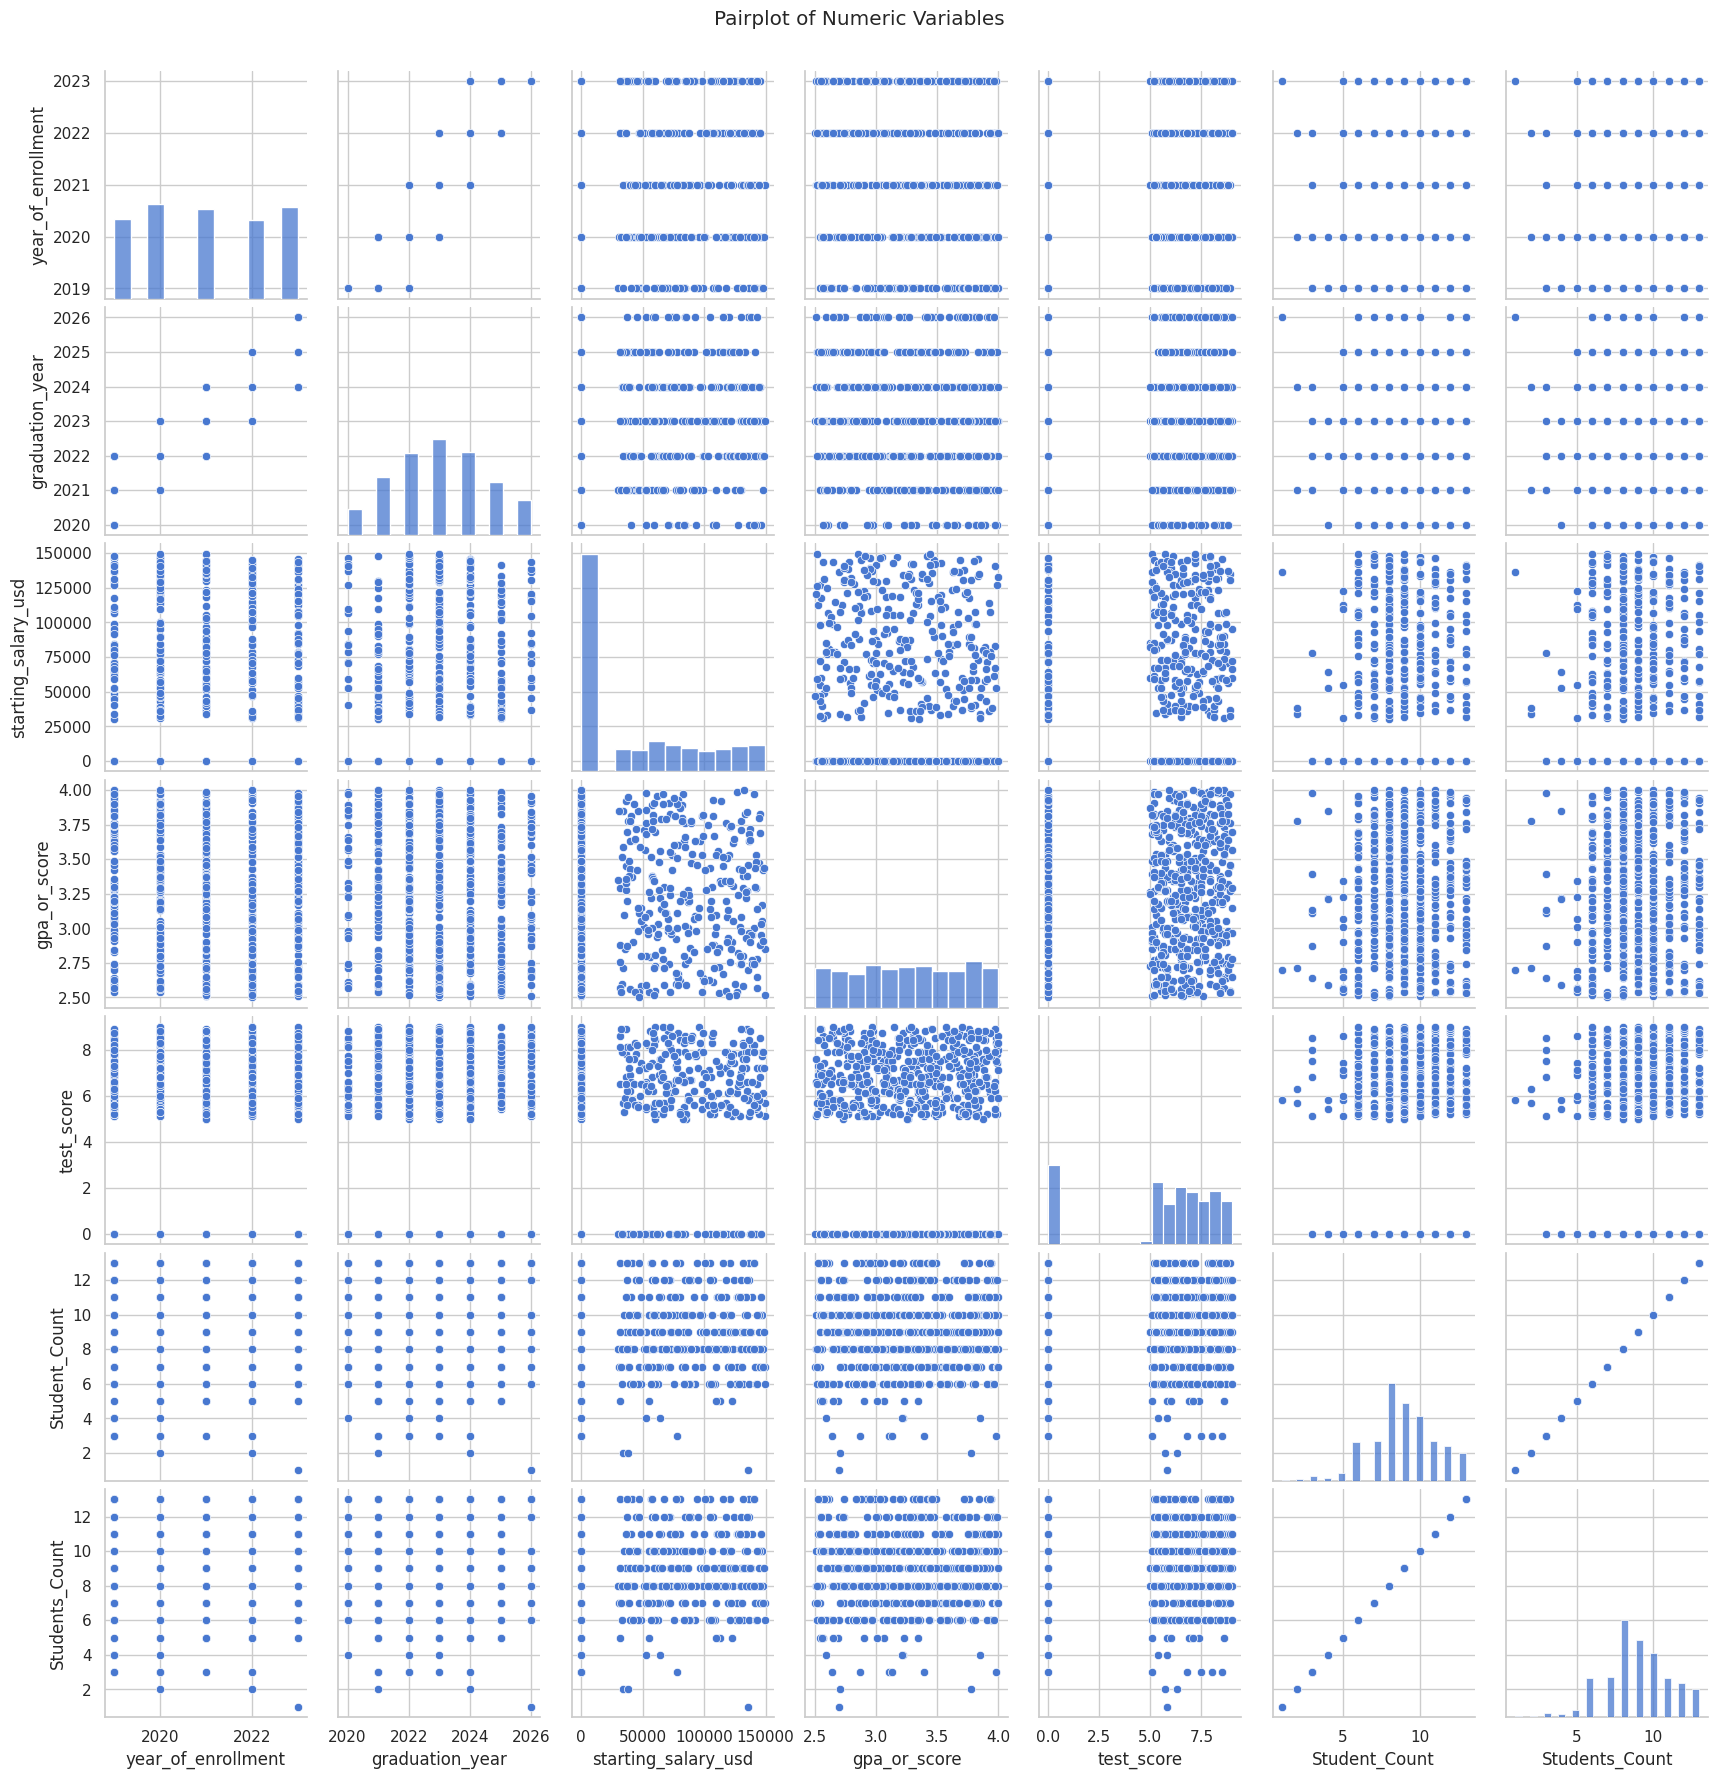

In [ ]:
# 7️⃣ Pairplot - Relationships between numeric variables
sns.pairplot(numeric_df)
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()


**Pivot table Visualization**

What it is: "This is a bar chart that visualizes the total number of students from each origin country, broken down by their year of enrollment. It was created from a pivot table, which is a great way to summarize and reorganize complex data."

The Process: "First, we created a pivot table to aggregate our data. We took our original dataset and reshaped it so that the years were our rows and the countries were our columns. For each combination, we summed up the Students_Count to get the total number of students."

How to Interpret the Chart: "Each group of bars on the horizontal axis represents a specific year of enrollment. Within each year's group, you'll see a bar for each country. The height of each bar shows the total student count for that country in that specific year."

Key Takeaway: "This plot is incredibly useful because it allows us to easily track student migration trends over time. We can compare the total student count from different countries in a single year, or we can look at a single country and see if its student count has been increasing or decreasing over the years. This gives us a clear picture of the temporal patterns in global student migration."

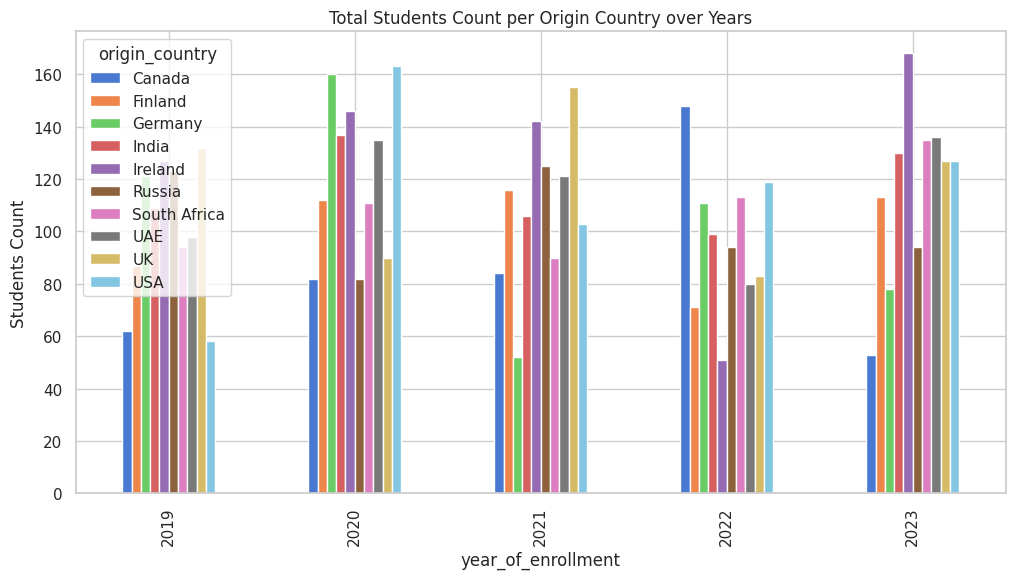

In [ ]:
# 6. PIVOT TABLE & GROUPBY ANALYSIS
 # 8️⃣Pivot table - Year of entrollment vs Origin  Country (sum of Students Count)
# -------------------------------
if {'year_of_enrollment', 'origin_country'}.issubset(df.columns):
    pivot_df = df.pivot_table(
        values='Students_Count',
        index='year_of_enrollment',
        columns='origin_country',
        aggfunc='sum'
    )
    pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.title("Total Students Count per Origin Country over Years")
    plt.ylabel("Students Count")
    plt.show()

**Line plot Visualization Explanation**

What it is: "This is a line plot that visualizes the trend of student counts over the years, but it focuses specifically on the single country with the highest total student count in our dataset."

The Process: "Before creating this plot, we first analyzed our data to identify which country had the largest total student population. We then filtered our dataset to include only the records from that country."

What the axes show: "The horizontal axis represents the year of enrollment, and the vertical axis shows the student count. Each point on the plot represents the student count for that specific year."

Key Takeaway: "This visualization is crucial for understanding a key trend in our data. It allows us to see at a glance whether the student count from our top-performing country has been increasing, decreasing, or staying consistent over the years. We can identify any major spikes or drops, which could lead to further investigation."

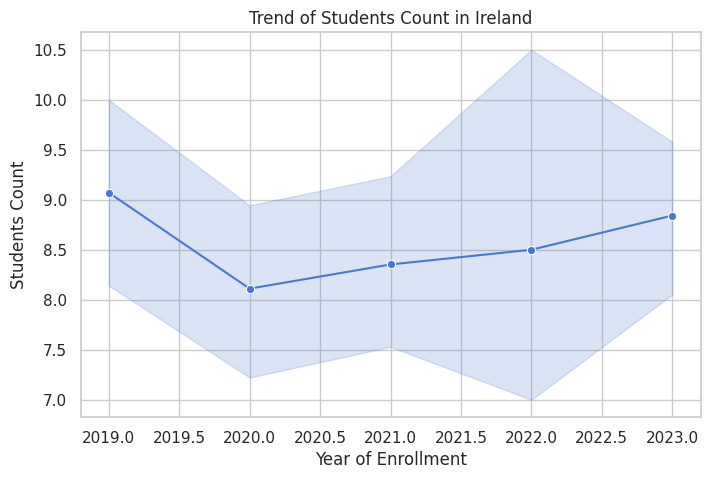

In [ ]:
# 9️⃣ Line plot - Trend over years for top country
# Check if the relevant columns exist
if {'year_of_enrollment', 'origin_country'}.issubset(df.columns):
    # Find top origin country by total student count
    top_country = df.groupby('origin_country')['Students_Count'].sum().idxmax()

    # Filter data for the top country
    top_data = df[df['origin_country'] == top_country]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=top_data, x='year_of_enrollment', y='Students_Count', marker='o')
    plt.title(f"Trend of Students Count in {top_country}")
    plt.xlabel("Year of Enrollment")
    plt.ylabel("Students Count")
    plt.show()

**Interactive Scatter plot Visualization Explanation**

What it is: "This is an interactive scatter plot created with the Plotly library. Unlike the static plots we've seen, this one allows us to directly engage with the data."

Key Interactive Features to Highlight:

Hover Functionality: "When I hover my mouse over any data point, a small box appears that gives me all the details for that specific record, such as the exact year, student count, and the country of origin."

Zoom and Pan: "You can also click and drag to zoom into a specific area of the plot to get a closer look at a cluster of data points, or you can pan around to explore different parts of the graph."

Sizing and Coloring: "The size of each circle is proportional to the number of students, and the color tells us the country of origin. This allows us to see three different pieces of information at once."

The Key Takeaway: "An interactive plot like this is perfect for presentations because it allows the audience to explore the data in a more dynamic way. It’s not just about what I want to show you, but it empowers you to ask your own questions and find your own insights within the data. This type of visualization helps us to quickly identify trends, significant events, and outliers from a multi-dimensional perspective."

In [ ]:
# 7. INTERACTIVE VISUAL WITH PLOTLY
# -------------------------------
# 🔟 Interactive scatter plot
import plotly.express as px

if {'year_of_enrollment', 'origin_country'}.issubset(df.columns):
    fig = px.scatter(df,
                     x='year_of_enrollment',
                     y='Students_Count',
                     color='origin_country',
                     size='Students_Count',
                     title="Interactive Students Count Scatter Plot")
    fig.show()


# Conclusion and Future Scope
Our analysis of the global student migration and higher education dataset has provided valuable insights into key trends and patterns from 2019 to 2023.

Key Findings:
Data Quality and Distribution: The initial data cleaning steps, including handling missing values and removing outliers, were crucial for ensuring the reliability of our analysis. The histogram and boxplots confirmed the distribution of student counts and identified and addressed potential anomalies.

Country-Specific Trends: The bar plot of average student counts per country and the line plot for the top-performing country revealed significant differences in student migration volumes across different regions. We were able to identify the country with the highest student count and visualize its specific trend over the years.

Inter-Variable Relationships: The correlation heatmap and pairplot provided a high-level view of the relationships between our numeric variables. This allowed us to quickly spot potential correlations, such as the relationship between Students_Count and year_of_enrollment, and to validate our data cleaning by comparing the results before and after outlier removal.

Dynamic Analysis: The interactive scatter plot using Plotly served as a powerful tool for exploring the data in a multi-dimensional way. By combining year, student count, and country of origin, we were able to see a more nuanced picture of global migration patterns.

Future Scope:
This analysis serves as a strong foundation for further research. To expand on this project, we could:

Placement and Career Analysis: Delve deeper into the placement_status and starting_salary_usd columns to analyze which courses, universities, or countries have the highest placement success rates and salary expectations.

Scholarship and Enrollment Factors: Investigate the relationship between scholarship_received, enrollment_reason, and the country of origin to understand what drives students' decisions.

Predictive Modeling: Use the cleaned and processed data to build a machine learning model that predicts a student's placement_status or starting_salary_usd based on their course, university, and GPA. This would provide a practical application of our analysis.

In-depth Country Analysis: Select a few key countries and perform a more detailed analysis of their specific student migration patterns, including popular courses and post-graduation visa statuses.